In [ ]:
import os
from pathlib import PosixPath
import random
import matplotlib.pyplot as plt
%matplotlib inline 

import numpy as np
from PIL import Image

import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras import preprocessing
from tensorflow.keras import callbacks
from tensorflow.keras import regularizers
from tensorflow.keras import optimizers

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_path = "/content/drive/MyDrive/project fibo last/PokemonData"
data_dir = PosixPath(data_path)

In [ ]:
image_count = len(list(data_dir.glob("*/*"))) #list path
print(f"Image count: {image_count}")

Image count: 6837


In [ ]:
random.seed(123)
seed = random.randint(0,100)
print(f"Current seed : {seed}")

Current seed : 6


In [ ]:
batch_size = 32
width = 224
height = 224

In [ ]:
train_dataset = preprocessing.image_dataset_from_directory(
    directory=data_path,
    validation_split=0.2,
    subset="training",
    seed=seed,
    image_size=(height,width),
    batch_size=batch_size
)

Found 6820 files belonging to 150 classes.
Using 5456 files for training.


In [ ]:
classes_count = len(train_dataset.class_names)
class_names = train_dataset.class_names
print(f"Class names: {class_names}")

Class names: ['Abra', 'Aerodactyl', 'Alakazam', 'Alolan Sandslash', 'Arbok', 'Arcanine', 'Articuno', 'Beedrill', 'Bellsprout', 'Blastoise', 'Bulbasaur', 'Butterfree', 'Caterpie', 'Chansey', 'Charizard', 'Charmander', 'Charmeleon', 'Clefable', 'Clefairy', 'Cloyster', 'Cubone', 'Dewgong', 'Diglett', 'Ditto', 'Dodrio', 'Doduo', 'Dragonair', 'Dragonite', 'Dratini', 'Drowzee', 'Dugtrio', 'Eevee', 'Ekans', 'Electabuzz', 'Electrode', 'Exeggcute', 'Exeggutor', 'Farfetchd', 'Fearow', 'Flareon', 'Gastly', 'Gengar', 'Geodude', 'Gloom', 'Golbat', 'Goldeen', 'Golduck', 'Golem', 'Graveler', 'Grimer', 'Growlithe', 'Gyarados', 'Haunter', 'Hitmonchan', 'Hitmonlee', 'Horsea', 'Hypno', 'Ivysaur', 'Jigglypuff', 'Jolteon', 'Jynx', 'Kabuto', 'Kabutops', 'Kadabra', 'Kakuna', 'Kangaskhan', 'Kingler', 'Koffing', 'Krabby', 'Lapras', 'Lickitung', 'Machamp', 'Machoke', 'Machop', 'Magikarp', 'Magmar', 'Magnemite', 'Magneton', 'Mankey', 'Marowak', 'Meowth', 'Metapod', 'Mew', 'Mewtwo', 'Moltres', 'MrMime', 'Muk', 'N

In [ ]:
val_dataset = preprocessing.image_dataset_from_directory(
    directory=data_path,
    validation_split=0.2,
    subset="validation",
    seed=seed,
    image_size=(height, width),
    batch_size=batch_size
)

Found 6820 files belonging to 150 classes.
Using 1364 files for validation.


In [ ]:
data_augmentation = Sequential(
    layers=[
        tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical", input_shape=(height,width,3)),
        tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
        tf.keras.layers.experimental.preprocessing.RandomZoom(0.1), 
        ], 
    name="data_augmentation"
    )

In [ ]:
def model_builder():
    # Create the model
    model = Sequential()
    
    # Load the pretrained model with its weights
    base_model = tf.keras.applications.MobileNet(input_shape=(width,height,3), weights="imagenet",include_top=False)
    
    # Setup the model : add the data augmentation layer defined above
    model.add(data_augmentation)
    
    # Add the pretrained MobileNet 
    model.add(base_model)
    # Features detector
    model.add(layers.GlobalAveragePooling2D())  
    model.add(layers.BatchNormalization())
    # Fully connected layers 
    model.add(layers.Dense(units=1024, activation="relu"))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(units=1024, activation="relu"))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(units=512, activation="relu"))
    model.add(layers.Dropout(0.2))
    # Final output : probabilities 
    model.add(layers.Dense(classes_count, activation="sigmoid",name="final_output"))
    
    # Compile the model
    model.compile(
        optimizer= optimizers.Adam(learning_rate=1e-3),
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

    return model

In [ ]:
model = model_builder()
print(f"Model : {model}")

17235968/17225924 [==============================] - 0s 0us/step
Model : <keras.engine.sequential.Sequential object at 0x7fcd7fc39fd0>


In [ ]:
stop_early = tf.keras.callbacks.EarlyStopping(
    monitor="val_accuracy", 
    patience=15, 
    mode ="max", 
    verbose=2, 
    restore_best_weights=True
)

In [ ]:
history = model.fit (
    train_dataset,
    validation_data=val_dataset,
    epochs=150,
    verbose=1, 
    callbacks=[stop_early]
)

Epoch 1/150
171/171 [==============================] - 657s 4s/step - loss: 3.9718 - accuracy: 0.1420 - val_loss: 5.4506 - val_accuracy: 0.0806
Epoch 2/150
171/171 [==============================] - 39s 223ms/step - loss: 2.4090 - accuracy: 0.3878 - val_loss: 3.8477 - val_accuracy: 0.2287
Epoch 3/150
171/171 [==============================] - 39s 224ms/step - loss: 1.8342 - accuracy: 0.5167 - val_loss: 2.9594 - val_accuracy: 0.3468
Epoch 4/150
171/171 [==============================] - 39s 225ms/step - loss: 1.4733 - accuracy: 0.6012 - val_loss: 2.1100 - val_accuracy: 0.4949
Epoch 5/150
171/171 [==============================] - 40s 228ms/step - loss: 1.2706 - accuracy: 0.6611 - val_loss: 1.3727 - val_accuracy: 0.6400
Epoch 6/150
171/171 [==============================] - 40s 229ms/step - loss: 1.0952 - accuracy: 0.7029 - val_loss: 1.6321 - val_accuracy: 0.5960
Epoch 7/150
171/171 [==============================] - 40s 229ms/step - loss: 1.0171 - accuracy: 0.7242 - val_loss: 2.1572 - v

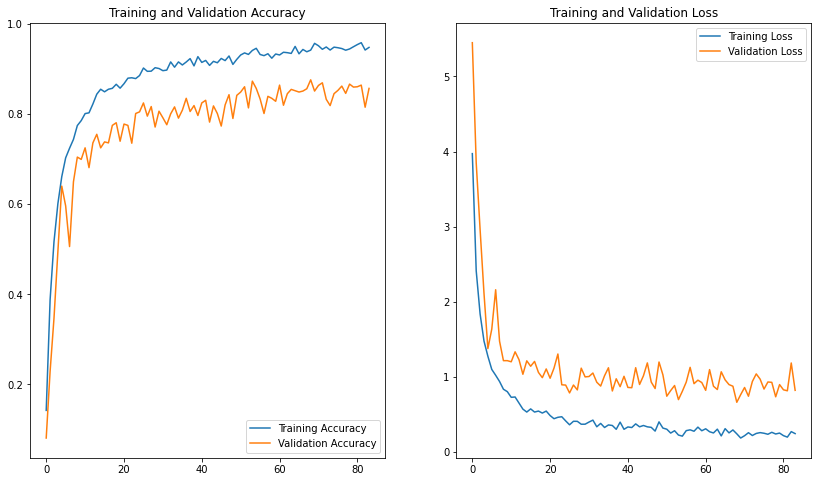

Maximum validation accuracy:  0.876099705696106
Minimum loss: 0.6568965315818787


In [ ]:
# Get the accuracy results for each epoch
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
# Get the loss results for each epoch
loss = history.history["loss"]
val_loss = history.history["val_loss"]
# Get the epochs count
epochs_range = range(len(history.history["loss"]))

# Create the plot area
plt.figure(figsize=(14, 8))

# Setup the first colum : Accuracy plot
plt.subplot(1, 2, 1)
# Plot the training and validation accuracy for these epochs
plt.plot(epochs_range, acc, label="Training Accuracy")
plt.plot(epochs_range, val_acc, label="Validation Accuracy")
# Setup the legend
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")

# Setup the second colum : Loss plot
plt.subplot(1, 2, 2)
# Plot the training and validation loss for these epochs
plt.plot(epochs_range, loss, label="Training Loss")
plt.plot(epochs_range, val_loss, label="Validation Loss")
# Setup the legend
plt.legend(loc="upper right")
plt.title("Training and Validation Loss")

# Show the overall plot
plt.show()

position = np.argmax(history.history["val_accuracy"])
print(f"Maximum validation accuracy:  {history.history['val_accuracy'][position]}\nMinimum loss: {history.history['val_loss'][position]}")

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 data_augmentation (Sequenti  (None, 224, 224, 3)      0         
 al)                                                             
                                                                 
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 global_average_pooling2d (G  (None, 1024)             0         
 lobalAveragePooling2D)                                          
                                                                 
 batch_normalization (BatchN  (None, 1024)             4096      
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 1024)              1

In [ ]:
model.evaluate(x=val_dataset, return_dict=True)

43/43 [==============================] - 5s 99ms/step - loss: 0.6569 - accuracy: 0.8761


{'accuracy': 0.876099705696106, 'loss': 0.6568963527679443}

In [ ]:
model.save("Pokemon_Image_Classifier_Model")

INFO:tensorflow:Assets written to: Pokemon_Image_Classifier_Model/assets


In [ ]:
import tensorflow as tf
tf.keras.models.save_model(model,'/content/drive/MyDrive/project fibo last/pokemon.hdf5')